In the video you just watched, Rafa looked at distributions of heights, and asked what was the probability of someone being shorter than a given height. In this assessment, we are going to ask the same question, but instead of people and heights, we are going to look at whole countries and the average life expectancy in those countries.

We will use the data set called "Gapminder" which is available as an R-package on Github. This data set contains the life expectancy, GDP per capita, and population by country, every five years, from 1952 to 2007. It is an excerpt of a larger and more comprehensive set of data available on Gapminder.org, and the R package of this dataset was created by the statistics professor Jennifer Bryan.

 

In [2]:
library(gapminder)
data(gapminder)
head(gapminder)

      country continent year lifeExp      pop gdpPercap
1 Afghanistan      Asia 1952  28.801  8425333  779.4453
2 Afghanistan      Asia 1957  30.332  9240934  820.8530
3 Afghanistan      Asia 1962  31.997 10267083  853.1007
4 Afghanistan      Asia 1967  34.020 11537966  836.1971
5 Afghanistan      Asia 1972  36.088 13079460  739.9811
6 Afghanistan      Asia 1977  38.438 14880372  786.1134

Create a vector 'x' of the life expectancies of each country for the year 1952. Plot a histogram of these life expectancies to see the spread of the different countries

In [5]:
x <- subset(gapminder, year == 1952)

In [7]:
head(x)

       country continent year lifeExp      pop  gdpPercap
1  Afghanistan      Asia 1952  28.801  8425333   779.4453
13     Albania    Europe 1952  55.230  1282697  1601.0561
25     Algeria    Africa 1952  43.077  9279525  2449.0082
37      Angola    Africa 1952  30.015  4232095  3520.6103
49   Argentina  Americas 1952  62.485 17876956  5911.3151
61   Australia   Oceania 1952  69.120  8691212 10039.5956

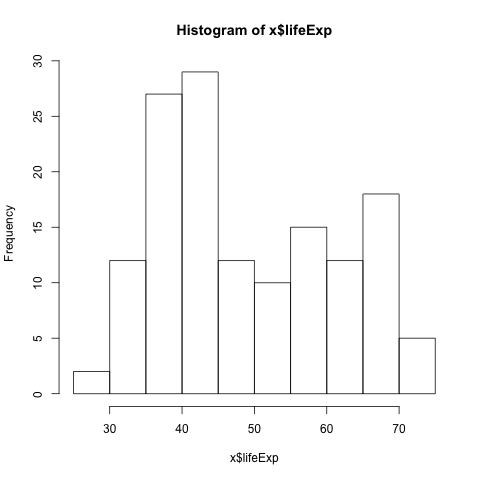

In [10]:
hist(x$lifeExp)

## QUESTION 1.1  (1/1 point)

In statistics, the empirical cumulative distribution function (or empirical cdf or empirical distribution function) is the function F(a) for any a, which tells you the proportion of the values which are less than or equal to a.

We can compute F in two ways: the simplest way is to type mean(x <= a). This calculates the number of values in x which are less than or equal a, divided by the total number of values in x, in other words the proportion of values less than or equal to a.

The second way, which is a bit more complex for beginners, is to use the ecdf() function. This is a bit complicated because this is a function that doesn't return a value, but a function.

Let's continue, using the simpler, mean() function.

#### What is the proportion of countries in 1952 that have a life expectancy less than or equal to 40?

In [12]:
mean(x$lifeExp <= 40)

[1] 0.2887324

## QUESTION 1.2  (1/1 point)

#### What is the proportion of countries in 1952 that have a life expectancy between 40 and 60 years? 
Hint: this is the proportion that have a life expectancy less than or equal to 60 years, minus the proportion that have a life expectancy less than or equal to 40 years.

In [17]:
(mean(x$lifeExp <= 60) - mean(x$lifeExp <=40))

[1] 0.4647887

## SAPPLY() ON A CUSTOM FUNCTION

Suppose we want to plot the proportions of countries with life expectancy 'q' for a range of different years. R has a built in function for this, plot(ecdf(x)), but suppose we didn't know this. The function is quite easy to build, by turning the code from question 1.1 into a custom function, and then using sapply(). Our custom function will take an input variable 'q', and return the proportion of countries in 'x' less than or equal to q. The curly brackets { and }, allow us to write an R function which spans multiple lines:

prop = function(q) {
  mean(x <= q)
}

Try this out for a value of 'q':  prop(40)

Now let's build a range of q's that we can apply the function to:

- qs = seq(from=min(x), to=max(x), length=20)

Print 'qs' to the R console to see what the seq() function gave us. Now we can use sapply() to apply the 'prop' function to each element of 'qs':

- props = sapply(qs, prop)

Take a look at 'props', either by printing to the console, or by plotting it over qs:

- plot(qs, props)

Note that we could also have written this in one line, by defining the 'prop' function but without naming it:

- props = sapply(qs, function(q) mean(x <= q))

This last style is called using an "inline" function or an "anonymous" function. Let's compare our homemade plot with the pre-built one in R:

- plot(ecdf(x))

In [24]:
head(gapminder)

      country continent year lifeExp      pop gdpPercap
1 Afghanistan      Asia 1952  28.801  8425333  779.4453
2 Afghanistan      Asia 1957  30.332  9240934  820.8530
3 Afghanistan      Asia 1962  31.997 10267083  853.1007
4 Afghanistan      Asia 1967  34.020 11537966  836.1971
5 Afghanistan      Asia 1972  36.088 13079460  739.9811
6 Afghanistan      Asia 1977  38.438 14880372  786.1134

In [26]:
x <- gapminder$lifeExp
prop = function(q) {
  mean(x<= q)
}

In [27]:
prop(40)

[1] 0.07335681

In [29]:
qs <- seq(from = min(x), to = max(x), length = 20)

In [30]:
qs

 [1] 23.59900 26.70447 29.80995 32.91542 36.02089 39.12637 42.23184 45.33732
 [9] 48.44279 51.54826 54.65374 57.75921 60.86468 63.97016 67.07563 70.18111
[17] 73.28658 76.39205 79.49753 82.60300

In [31]:
min(x)

[1] 23.599

In [32]:
props <- sapply(qs, prop)

In [33]:
props

 [1] 0.0005868545 0.0005868545 0.0011737089 0.0093896714 0.0252347418
 [6] 0.0563380282 0.1156103286 0.1877934272 0.2582159624 0.3227699531
[11] 0.3785211268 0.4395539906 0.5035211268 0.5569248826 0.6220657277
[16] 0.7130281690 0.8427230047 0.9295774648 0.9829812207 1.0000000000

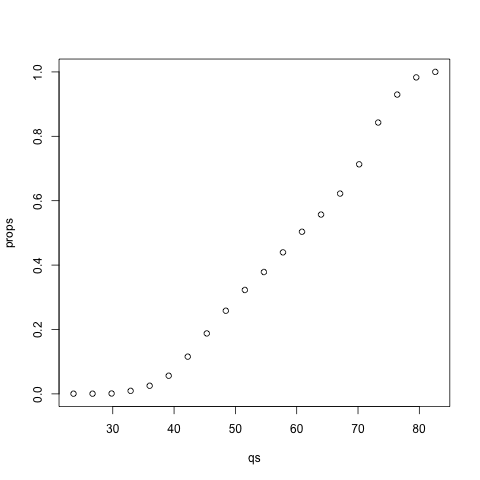

In [34]:
plot(qs, props)

In [35]:
## 정리하면
## props <- sapply(qs, function(q) mean(x <= q))

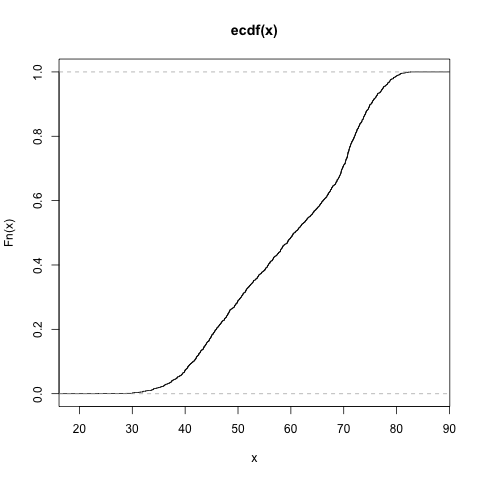

In [36]:
plot(ecdf(x))

## QUESTION 2.1  (1/1 point)

Create a vector which gives the population sizes of the countries in 1952. Examine the histogram of these population sizes (it might help to increase the number of 'breaks'). Now examine the histogram of the log10 of these population sizes. We will try to find parameters for a Normal distribution which match the logarithm (base 10) of population sizes.

Note: you need to use the log10() function to look at the log10 of population sizes. Do not use the log() function, which gives you logarithm using a base of 'e' (~2.718).

#### What is the standard deviation of the log10 of population size of the countries in 1952? Use R's built-in function for the standard deviation: sd()

In [37]:
head(gapminder)

      country continent year lifeExp      pop gdpPercap
1 Afghanistan      Asia 1952  28.801  8425333  779.4453
2 Afghanistan      Asia 1957  30.332  9240934  820.8530
3 Afghanistan      Asia 1962  31.997 10267083  853.1007
4 Afghanistan      Asia 1967  34.020 11537966  836.1971
5 Afghanistan      Asia 1972  36.088 13079460  739.9811
6 Afghanistan      Asia 1977  38.438 14880372  786.1134

In [43]:
dat1952 <- subset(gapminder, gapminder$year == 1952)

In [46]:
head(dat1952)

ERROR: Error in parse(text = x, srcfile = src): <text>:1:21: 예기치 않은 '='입니다
1: head(dat1952, break =
                        ^


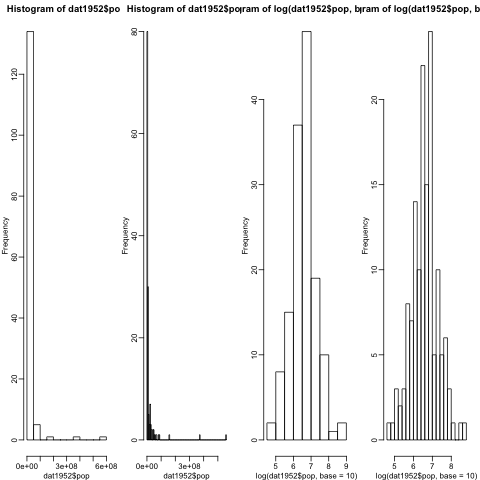

In [59]:
library(rafalib)
mypar2(1, 4)
hist(dat1952$pop)
hist(dat1952$pop, breaks = 100)
hist(log(dat1952$pop, base = 10))
hist(log(dat1952$pop, base = 10), breaks = 20)

In [61]:
sd(log(dat1952$pop, base = 10))

[1] 0.7070292

## QUESTION 2.2  (1/1 point)

We want to further explore the log10 of the 1952 population sizes, and compare to a Normal distribution. Create a vector 'x' of the log10 of the 1952 population sizes.

Examine a Q-Q plot of this vector, comparing to the theoretical quantiles of a Normal distribution. You can use qqnorm() directly on the vector to do this. Note that, while the observations are generally along a line, the sample quantiles are not centered on 0.

Standardize the log10 population size vector, by subtracting the mean and dividing by the standard deviation. Save this to a new vector 'z'. You have to make sure to wrap the subtraction operation in parentheses before dividing, to ensure that this operation happens first, as in: (a - b)/c.

Examine a Q-Q plot of 'z' against the Normal distribution using qqnorm(). You can add a diagonal "identity line" with abline(0,1).

What is the z-score of the country with the largest population size? (you can use max(z) to see the very last and largest value).

In [62]:
pop_log <- log(dat1952$pop, base = 10)
pop_log

  [1] 6.925587 6.108124 6.967526 6.626555 7.252294 6.939080 6.840594 5.080796
  [9] 7.671051 6.941034 6.240128 6.459892 6.445760 5.645725 7.752836 6.861827
 [17] 6.650305 6.388389 6.671528 6.699757 7.169838 6.111160 6.428534 6.804659
 [25] 8.745281 7.091694 5.187340 7.149219 5.931908 5.966760 6.473782 6.589081
 [33] 6.778715 6.960242 6.636889 4.800366 6.396434 6.550076 7.346809 6.310240
 [41] 5.336388 6.157988 7.319334 6.611776 7.627977 5.623975 5.453807 7.839767
 [49] 6.746712 6.888362 6.497811 6.425575 5.763917 6.505352 6.181115 6.327543
 [57] 6.977906 5.170150 8.570543 7.914089 7.237343 6.735740 6.470139 6.209760
 [65] 7.678209 6.154148 7.936810 5.783842 6.810504 6.947703 7.321134 5.204120
 [73] 6.158220 5.874335 5.936166 6.008485 6.677873 6.465056 6.829199 6.584124
 [81] 6.009687 5.713117 7.479205 5.903450 5.616826 6.997352 6.809312 7.303045
 [89] 5.686485 6.962963 7.016281 6.299898 6.066620 6.528848 7.520078 6.522148
 [97] 5.705721 7.616439 5.973165 6.191975 6.904483 7.350998 7.41

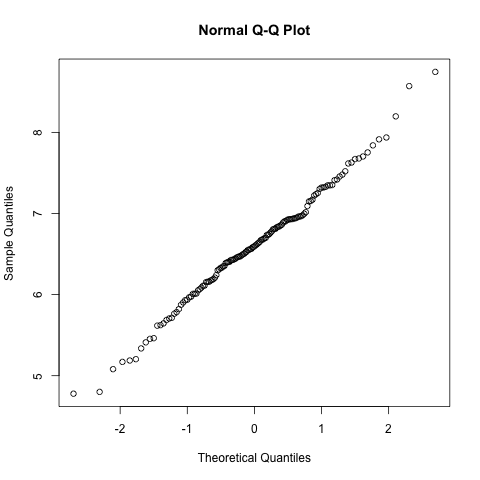

In [68]:
qqnorm(pop_log)

In [70]:
m_pop <- mean(pop_log)
m_sd <- sd(pop_log)
z <- (pop_log - m_pop)/m_sd

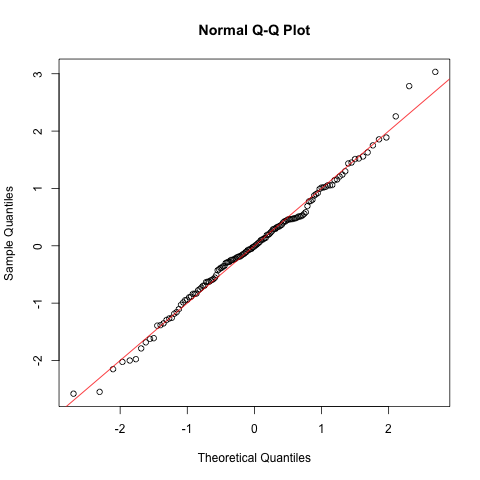

In [73]:
qqnorm(z)
abline(0, 1, col = "red")

In [76]:
max(z)

[1] 3.03194

## QUESTION 2.3  (1/1 point)

Now we will use a Normal distribution approximation of the real distribution to ask questions about the expected proportions.

We will use the vector 'x' of the log10 of the 1952 population sizes for each country. We are going to create a function which gives back the Normal distribution cumulative density function for a Normal with the same mean and standard deviation as the vector x. This is accomplished by writing a one line function which uses pnorm(). pnorm() takes a value 'q', and returns the proportion of a Normal distribution which is less than or equal to 'q', for a Normal with a given mean and standard deviation.

- F = function(q) pnorm(q, mean=mean(x), sd=sd(x))

Now, we can use our Normal approximation function to get the proportion of countries that have a log10 1952 population less than or equal to any number. For example, the approximate proportion of countries that have less than or equal to 1 million people in 1952 is given by F(6). This relies on knowing the fact that 1 million = 10^6.

Suppose we want to know the number of countries, not the proportion. This is the proportion times the total number of countries. So, the next step is to store the total number of countries to a value 'n':

- n = length(x)

Finally, using the Normal approximation, estimate the number of countries that should have a log10 1952 population between 6 and 7 (i.e., between 1 million and 10 million people)? The answer should be the proportion from the normal approximation times the total number of countries.

In [77]:
head(pop_log)

[1] 6.925587 6.108124 6.967526 6.626555 7.252294 6.939080

In [79]:
F <- function(q) pnorm(q, mean = mean(pop_log), sd = sd(pop_log))

In [80]:
n <- length(pop_log)

In [85]:
n * (F(7) - F(6))

[1] 73.27622

## CONVENIENCE OF Z-SCORES

Finally, we note that, using z-scores can save us some typing, as the default distribution for pnorm() is a normal distribution with mean 0 and standard deviation 1.

Suppose we want to know the proportion of our normal approximation which is less than each value in 'x'.

This means, to use the pnorm() function on 'x', with the mean set to mean(x) and the standard deviation set to sd(x):

- head(pnorm(x, mean=mean(x), sd=sd(x)))

An equivalent way to answer this question is to use the z-scores we already built from 'x' and supply these to pnorm(). This works, because the mean of 'z' is 0 and the standard deviation is 1. Check this for yourself:

- mean(z)
- sd(z)

So we can use the z-score vector directly, and just use the default values of 'mean' and 'sd' for pnorm():

- head(pnorm(z))

In [87]:
pnorm(pop_log, mean=mean(pop_log), sd = sd(pop_log))

  [1] 0.676603488 0.242597289 0.697609903 0.514072109 0.821293396 0.683428010
  [7] 0.632322088 0.015738378 0.934807189 0.684411228 0.304581247 0.420567253
 [13] 0.412767853 0.088191609 0.948264802 0.643578925 0.527454337 0.381488113
 [19] 0.539386627 0.555201704 0.789210096 0.243941982 0.403307574 0.613014439
 [25] 0.998785061 0.755894939 0.022733932 0.780688412 0.171766618 0.184615793
 [31] 0.428263214 0.492930492 0.598896163 0.694005436 0.519897464 0.005422970
 [37] 0.385833303 0.470947008 0.854055025 0.340130781 0.036767804 0.265183550
 [43] 0.844976901 0.505735752 0.926701871 0.083372589 0.052250120 0.960045049
 [49] 0.581302508 0.657471445 0.441640695 0.401688200 0.118046606 0.445853082
 [55] 0.276010053 0.349143757 0.702713448 0.021453552 0.997321930 0.968296616
 [61] 0.815716070 0.575231002 0.426242305 0.289713609 0.936083914 0.263407063
 [67] 0.970518188 0.123712509 0.616175930 0.687756646 0.845582749 0.024045279
 [73] 0.265291107 0.151825370 0.173305117 0.200763015 0.54294751

In [88]:
mean(z)

[1] -2.410962e-16

In [89]:
sd(z)

[1] 1

In [90]:
pnorm(z)

  [1] 0.676603488 0.242597289 0.697609903 0.514072109 0.821293396 0.683428010
  [7] 0.632322088 0.015738378 0.934807189 0.684411228 0.304581247 0.420567253
 [13] 0.412767853 0.088191609 0.948264802 0.643578925 0.527454337 0.381488113
 [19] 0.539386627 0.555201704 0.789210096 0.243941982 0.403307574 0.613014439
 [25] 0.998785061 0.755894939 0.022733932 0.780688412 0.171766618 0.184615793
 [31] 0.428263214 0.492930492 0.598896163 0.694005436 0.519897464 0.005422970
 [37] 0.385833303 0.470947008 0.854055025 0.340130781 0.036767804 0.265183550
 [43] 0.844976901 0.505735752 0.926701871 0.083372589 0.052250120 0.960045049
 [49] 0.581302508 0.657471445 0.441640695 0.401688200 0.118046606 0.445853082
 [55] 0.276010053 0.349143757 0.702713448 0.021453552 0.997321930 0.968296616
 [61] 0.815716070 0.575231002 0.426242305 0.289713609 0.936083914 0.263407063
 [67] 0.970518188 0.123712509 0.616175930 0.687756646 0.845582749 0.024045279
 [73] 0.265291107 0.151825370 0.173305117 0.200763015 0.54294751

## QUESTION 2.4  (1 point possible)

In the previous video and in problem 2.2 above, we used a QQ plot, as a diagnostic to see if a sample was approximately normally distributed. Here, we will recreate such a plot from scratch. The plot we want to create is:

- qqnorm(x)

...which shows the quantiles of a standard normal distribution (mean 0, standard deviation 1) on the x-axis, and the sample quantiles on the y-axis. If the points fall along a line, then the sample is approximately normally distributed. We can build this plot using the quantiles of a standard normal, and the same quantiles of our sample. First we need to find the number of observations in our sample:

- n = length(x)

The sorted values of x represent n quantiles of the sample distribution spread from 0.0 to 1.0, however the quantiles do not include 0 and 1. Therefore, the sorted values of x are considered the 0.5/n, 1.5/n, 2.5/n, ..., (n - 0.5)/n quantiles of the sample distribution. Or in code, we want to find the quantiles of the standard normal distribution which are associated with the following probabilities:

- ps = ((1:n) - 0.5)/n

The matching quantiles of the standard normal distribution can be found by plugging ps into qnorm().

#### What is the quantile of the standard normal distribution which matches to the smallest number in x (the first element of sort(x))?

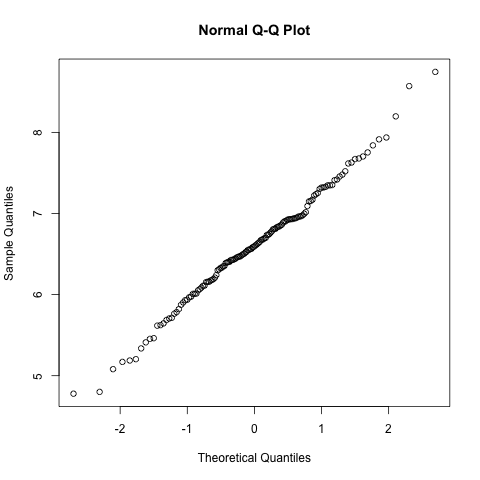

In [91]:
qqnorm(pop_log)

In [92]:
n <- length(pop_log)

In [98]:
n

[1] 142

In [99]:
ps = ((1:n) - 0.5)/n
ps

  [1] 0.003521127 0.010563380 0.017605634 0.024647887 0.031690141 0.038732394
  [7] 0.045774648 0.052816901 0.059859155 0.066901408 0.073943662 0.080985915
 [13] 0.088028169 0.095070423 0.102112676 0.109154930 0.116197183 0.123239437
 [19] 0.130281690 0.137323944 0.144366197 0.151408451 0.158450704 0.165492958
 [25] 0.172535211 0.179577465 0.186619718 0.193661972 0.200704225 0.207746479
 [31] 0.214788732 0.221830986 0.228873239 0.235915493 0.242957746 0.250000000
 [37] 0.257042254 0.264084507 0.271126761 0.278169014 0.285211268 0.292253521
 [43] 0.299295775 0.306338028 0.313380282 0.320422535 0.327464789 0.334507042
 [49] 0.341549296 0.348591549 0.355633803 0.362676056 0.369718310 0.376760563
 [55] 0.383802817 0.390845070 0.397887324 0.404929577 0.411971831 0.419014085
 [61] 0.426056338 0.433098592 0.440140845 0.447183099 0.454225352 0.461267606
 [67] 0.468309859 0.475352113 0.482394366 0.489436620 0.496478873 0.503521127
 [73] 0.510563380 0.517605634 0.524647887 0.531690141 0.53873239

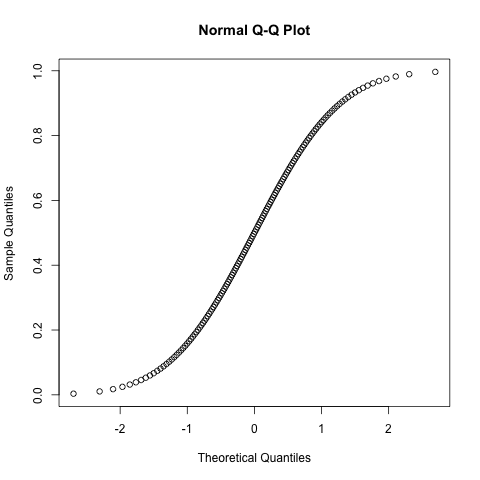

In [100]:
qqnorm(ps)

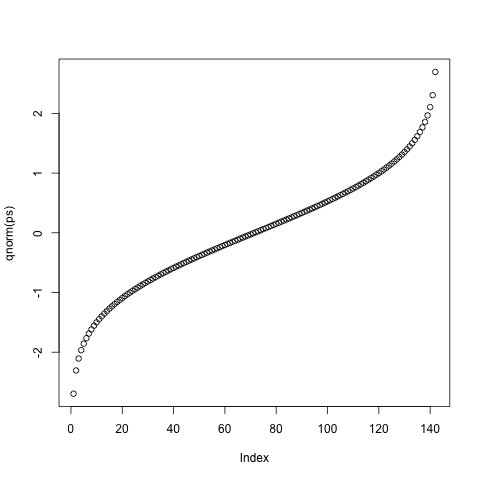

In [101]:
plot(qnorm(ps))

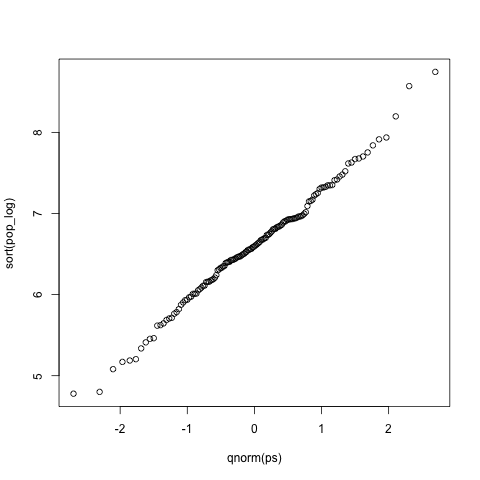

In [104]:
plot(qnorm(ps), sort(pop_log))

In [102]:
qnorm(ps)

  [1] -2.69483954 -2.30571146 -2.10592040 -1.96602455 -1.85651433 -1.76558923
  [7] -1.68728119 -1.61813363 -1.55595703 -1.49927303 -1.44703428 -1.39847048
 [13] -1.35299778 -1.31016257 -1.26960504 -1.23103477 -1.19421375 -1.15894434
 [19] -1.12506054 -1.09242148 -1.06090650 -1.03041145 -1.00084571 -0.97212993
 [25] -0.94419419 -0.91697655 -0.89042181 -0.86448058 -0.83910846 -0.81426535
 [31] -0.78991491 -0.76602408 -0.74256270 -0.71950311 -0.69681993 -0.67448975
 [37] -0.65249095 -0.63080350 -0.60940878 -0.58828945 -0.56742932 -0.54681325
 [43] -0.52642702 -0.50625727 -0.48629142 -0.46651758 -0.44692449 -0.42750151
 [49] -0.40823849 -0.38912579 -0.37015419 -0.35131491 -0.33259950 -0.31399988
 [55] -0.29550827 -0.27711717 -0.25881932 -0.24060773 -0.22247560 -0.20441633
 [61] -0.18642349 -0.16849080 -0.15061213 -0.13278149 -0.11499296 -0.09724075
 [67] -0.07951913 -0.06182245 -0.04414511 -0.02648156 -0.00882627  0.00882627
 [73]  0.02648156  0.04414511  0.06182245  0.07951913  0.0972407

In [103]:
ps

  [1] 0.003521127 0.010563380 0.017605634 0.024647887 0.031690141 0.038732394
  [7] 0.045774648 0.052816901 0.059859155 0.066901408 0.073943662 0.080985915
 [13] 0.088028169 0.095070423 0.102112676 0.109154930 0.116197183 0.123239437
 [19] 0.130281690 0.137323944 0.144366197 0.151408451 0.158450704 0.165492958
 [25] 0.172535211 0.179577465 0.186619718 0.193661972 0.200704225 0.207746479
 [31] 0.214788732 0.221830986 0.228873239 0.235915493 0.242957746 0.250000000
 [37] 0.257042254 0.264084507 0.271126761 0.278169014 0.285211268 0.292253521
 [43] 0.299295775 0.306338028 0.313380282 0.320422535 0.327464789 0.334507042
 [49] 0.341549296 0.348591549 0.355633803 0.362676056 0.369718310 0.376760563
 [55] 0.383802817 0.390845070 0.397887324 0.404929577 0.411971831 0.419014085
 [61] 0.426056338 0.433098592 0.440140845 0.447183099 0.454225352 0.461267606
 [67] 0.468309859 0.475352113 0.482394366 0.489436620 0.496478873 0.503521127
 [73] 0.510563380 0.517605634 0.524647887 0.531690141 0.53873239